In [1]:
# Install the latest versions of datasets and fsspec
!pip install -U fastai pandas fsspec huggingface_hub scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# Step 1: Install and Setup FastAI

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.4 MB/s eta 0:00:00
Mounted at /content/gdrive


# Step 2: Load Dataset

In [2]:
import pandas as pd
from datasets import load_dataset
import pandas as pd
from fastai.text.all import *

# Load dataset from Hugging Face Parquet file
df = pd.read_parquet("hf://datasets/boltuix/emotions-dataset/emotions_dataset.parquet")

# Quick preview
print(df.head())
print(df['Label'].value_counts())

# Convert labels to string
df['Label'] = df['Label'].astype(str)
#df = df.sample(50000, random_state=42)  # downsample for faster runs


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


                                                                                                                                 Sentence  \
0  Unfortunately later died from eating tainted meat NAME BBC documentary dynasties followed the marsh pride the lion episode was awesome   
1                                     Last time I saw was loooong ago. Basically before LN announced they went for probabilistic routing.   
2                         You mean by number of military personnel? Because if you go by navy size or budget thats not even remotely true   
3                                                                         Need to go middle of the road no NAME is going to vote for NAME   
4                                                                                                feel melty miserable enough imagine must   

       Label  
0  happiness  
1    neutral  
2    neutral  
3    sadness  
4    sadness  
Label
happiness    31205
sadness      17809
neutral      15733


#  Step 3 : ULMFiT using FastAI

In [3]:
from fastai.text.all import *

# Load into DataLoaders
dls = TextDataLoaders.from_df(
    df,
    text_col='Sentence',
    label_col='Label',
    valid_pct=0.2,
    seed=42,
    bs=64
)

# Define ULMFiT learner
learn = text_classifier_learner(
    dls,
    AWD_LSTM,
    drop_mult=0.7, # dropout to avoid overfitting
    metrics=[accuracy, F1Score(average='macro')]
)

Suggested LR (valley): 3.63e-03


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.911327,1.717799,0.389132,0.355332,02:21


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.588698,1.382221,0.507026,0.478198,02:34
1,1.371993,1.180833,0.585735,0.579905,02:35
2,1.191423,1.042914,0.629298,0.610888,02:35
3,1.134682,0.988189,0.647919,0.631370,02:34
4,1.042303,0.962057,0.658277,0.641815,02:34
5,1.045828,0.958102,0.659343,0.643330,02:34


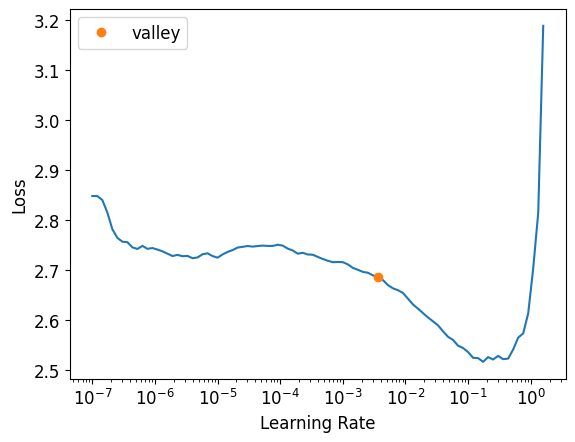

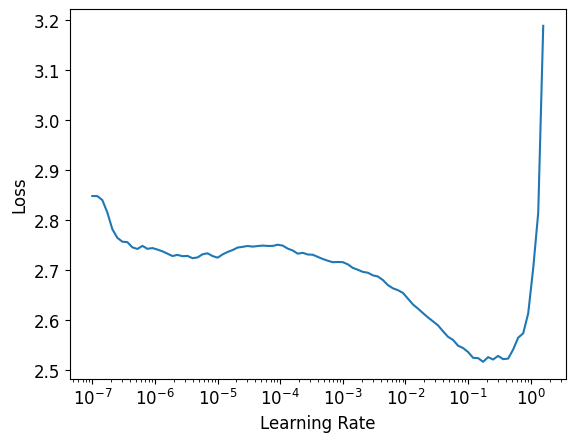

In [4]:
import torch
from fastai.text.all import *
import torch.serialization
from fastcore.foundation import L
torch.serialization.add_safe_globals([L])

#Find learning rate
lr_result = learn.lr_find()
learn.recorder.plot_lr_find()

# Use suggested learning rate
print(f"Suggested LR (valley): {lr_result.valley:.2e}")
learn.fine_tune(6, base_lr=lr_result.valley)


Classification Report ULMFiT:


              precision    recall  f1-score   support

       anger       0.55      0.69      0.62      2670
   confusion       0.50      0.38      0.43      1666
      desire       0.87      0.86      0.86       485
     disgust       0.52      0.40      0.45      1714
        fear       0.74      0.73      0.73      1804
       guilt       0.58      0.62      0.60       676
   happiness       0.72      0.77      0.74      6233
        love       0.69      0.68      0.69      2122
     neutral       0.55      0.62      0.58      3112
     sadness       0.76      0.77      0.76      3482
     sarcasm       0.96      1.00      0.98       551
       shame       0.60      0.40      0.48       859
    surprise       0.64      0.33      0.44       887

    accuracy                           0.66     26261
   macro avg       0.67      0.63      0.64     26261
weighted avg       0.66      0.66      0.65     26261



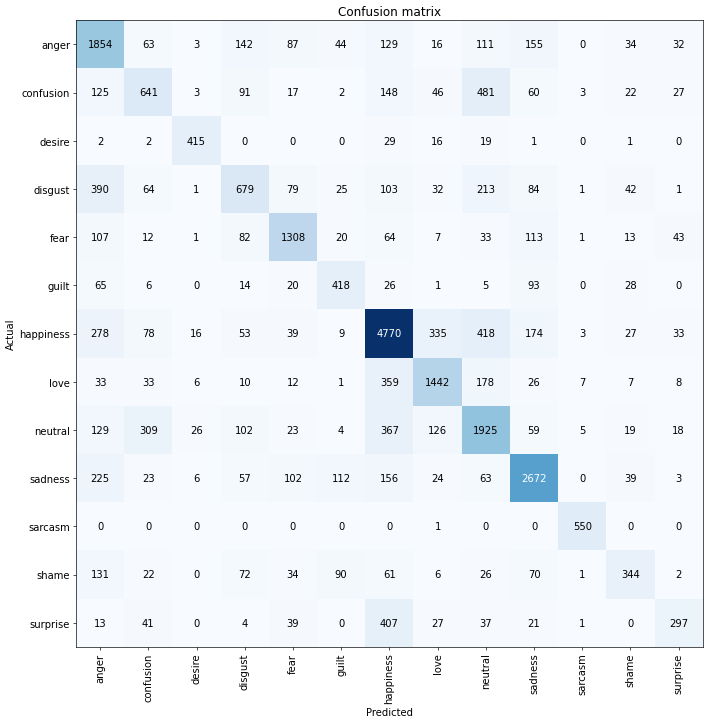

In [9]:
# Step 6: Visualize Confusion Matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)
print("\nClassification Report ULMFiT:")
interp.print_classification_report()

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.036019,0.956357,0.658695,0.644934,01:47


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.060052,0.957809,0.659305,0.643808,01:51


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.061560,0.950101,0.663455,0.648758,02:18
1,1.053143,0.945488,0.662656,0.647814,02:18


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.059758,0.952491,0.663036,0.648226,02:18


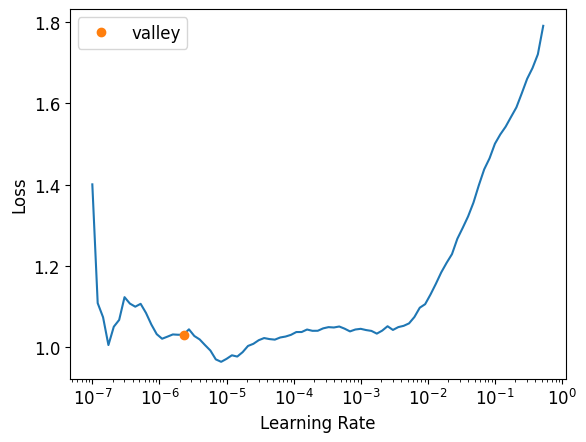

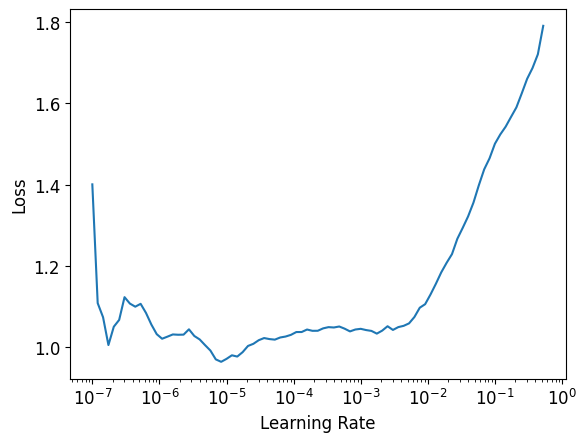

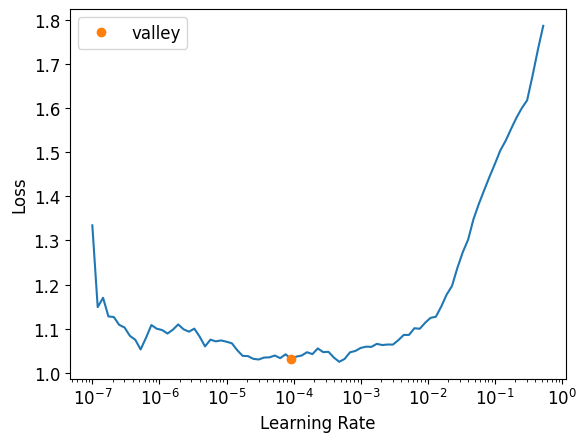

In [8]:
# Find optimal learning rate
learn.lr_find()
learn.recorder.plot_lr_find()
chosen_lr = learn.lr_find().valley

# Fine-tuning with gradual unfreezing
# Step 1: Train only the final classification head
learn.freeze()
learn.fit_one_cycle(1, lr_max=chosen_lr)

# Step 2: Unfreeze one more layer
learn.freeze_to(-2)
learn.fit_one_cycle(1, lr_max=chosen_lr / 2)

# Step 3: Unfreeze entire model and train with discriminative learning rate
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(chosen_lr / 10, chosen_lr))

# Step 4: (Optional) More fine-tuning
learn.fit_one_cycle(1, lr_max=slice(chosen_lr / 20, chosen_lr / 2))

              precision    recall  f1-score   support

       anger       0.57      0.68      0.62      2670
   confusion       0.49      0.40      0.44      1666
      desire       0.87      0.85      0.86       485
     disgust       0.51      0.42      0.46      1714
        fear       0.76      0.73      0.74      1804
       guilt       0.62      0.59      0.60       676
   happiness       0.72      0.77      0.74      6233
        love       0.69      0.69      0.69      2122
     neutral       0.57      0.58      0.58      3112
     sadness       0.75      0.78      0.77      3482
     sarcasm       0.95      1.00      0.97       551
       shame       0.55      0.42      0.48       859
    surprise       0.62      0.37      0.46       887

    accuracy                           0.66     26261
   macro avg       0.67      0.64      0.65     26261
weighted avg       0.66      0.66      0.66     26261



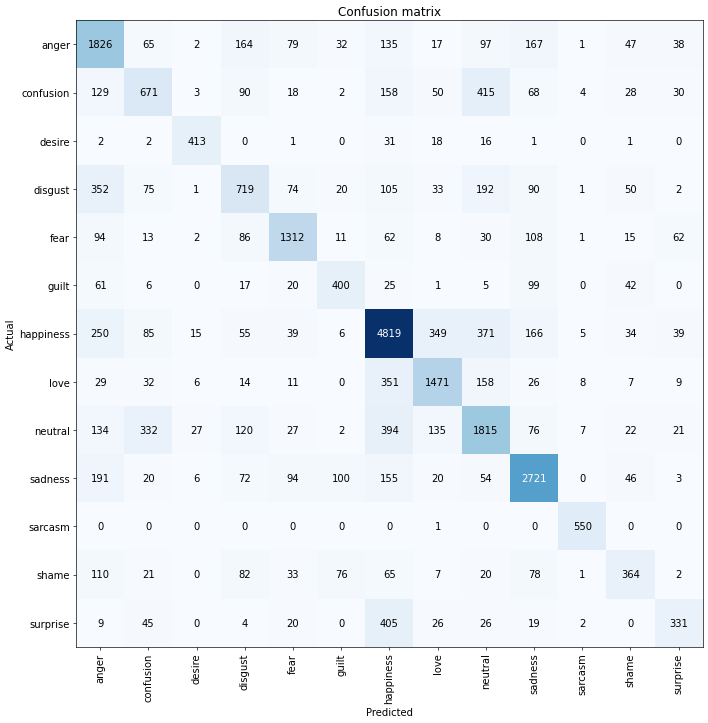

In [11]:
# Step 6: Visualize Confusion Matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)
interp.print_classification_report()

# Step 4 : Traditional NLP Model (TF-IDF + Logistic Regression)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Label'], test_size=0.2, random_state=42)

# TF-IDF encoding
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

# Evaluate
y_pred = clf.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"LogReg Accuracy: {acc:.4f}")
print(f"LogReg Macro F1: {f1:.4f}")

LogReg Accuracy: 0.5927
LogReg Macro F1: 0.5705


In [8]:
#print classification report
from sklearn.metrics import classification_report

print("\nClassification Report TF-IDF with LogReg:")
print(classification_report(y_test, y_pred))


Classification Report TF-IDF with LogReg:
              precision    recall  f1-score   support

       anger       0.57      0.53      0.55      2668
   confusion       0.36      0.23      0.28      1615
      desire       0.88      0.80      0.84       486
     disgust       0.51      0.39      0.44      1688
        fear       0.75      0.65      0.70      1742
       guilt       0.55      0.37      0.44       685
   happiness       0.64      0.76      0.69      6349
        love       0.62      0.49      0.54      2078
     neutral       0.42      0.65      0.51      3171
     sadness       0.70      0.72      0.71      3527
     sarcasm       0.97      0.95      0.96       503
       shame       0.54      0.30      0.39       839
    surprise       0.61      0.27      0.37       911

    accuracy                           0.59     26262
   macro avg       0.62      0.55      0.57     26262
weighted avg       0.60      0.59      0.58     26262




Classification Report TF-IDF with LogReg:
              precision    recall  f1-score   support

       anger       0.57      0.53      0.55      2668
   confusion       0.36      0.23      0.28      1615
      desire       0.88      0.80      0.84       486
     disgust       0.51      0.39      0.44      1688
        fear       0.75      0.65      0.70      1742
       guilt       0.55      0.37      0.44       685
   happiness       0.64      0.76      0.69      6349
        love       0.62      0.49      0.54      2078
     neutral       0.42      0.65      0.51      3171
     sadness       0.70      0.72      0.71      3527
     sarcasm       0.97      0.95      0.96       503
       shame       0.54      0.30      0.39       839
    surprise       0.61      0.27      0.37       911

    accuracy                           0.59     26262
   macro avg       0.62      0.55      0.57     26262
weighted avg       0.60      0.59      0.58     26262



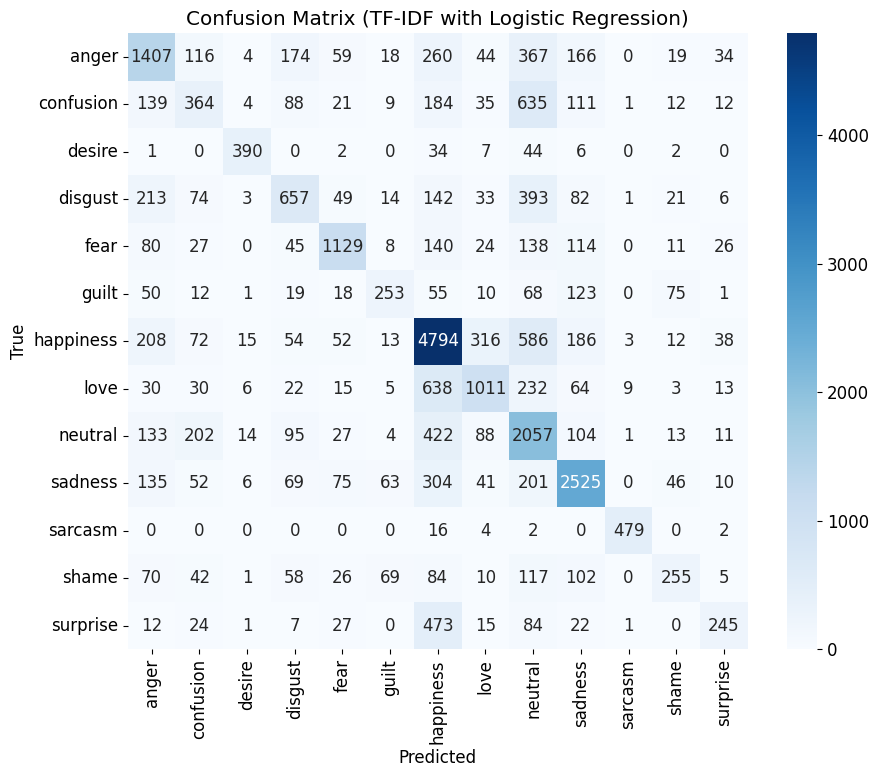

In [11]:
# prompt: # visualize model results
import seaborn as sns

import matplotlib.pyplot as plt
# Print classification report for Logistic Regression
print("\nClassification Report TF-IDF with LogReg:")
print(classification_report(y_test, y_pred))

# Visualize Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (TF-IDF with Logistic Regression)')
plt.show()


Top 15 words per class (TF-IDF coefficients):

--- Class: anger ---
frustration: 7.5552
angry: 6.9407
resentful: 6.6841
feel: 6.5941
fuck: 6.3559
rebellious: 6.2057
irritable: 6.1115
bitchy: 6.0942
greedy: 6.0262
cranky: 5.5054
rude: 5.4385
violent: 5.3996
petty: 5.3988
impatient: 5.3896
stubborn: 5.3793


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


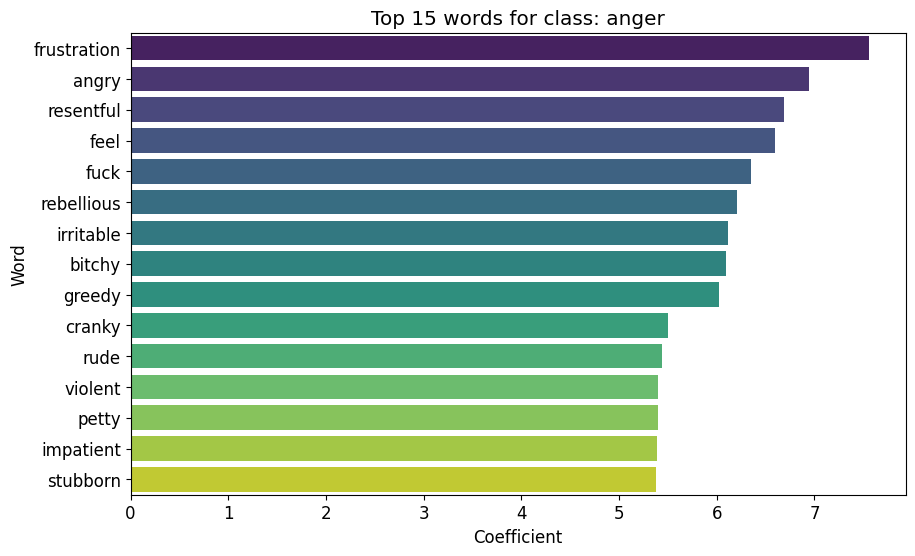


--- Class: confusion ---
curious: 5.6123
confused: 4.8670
annoying: 3.6910
disappointing: 3.2749
curiosity: 3.2110
why: 3.1995
whats: 3.0821
confusing: 3.0430
realized: 2.9439
realize: 2.9390
does: 2.7310
disappointed: 2.6020
dumb: 2.5697
what: 2.4582
pissed: 2.3837


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


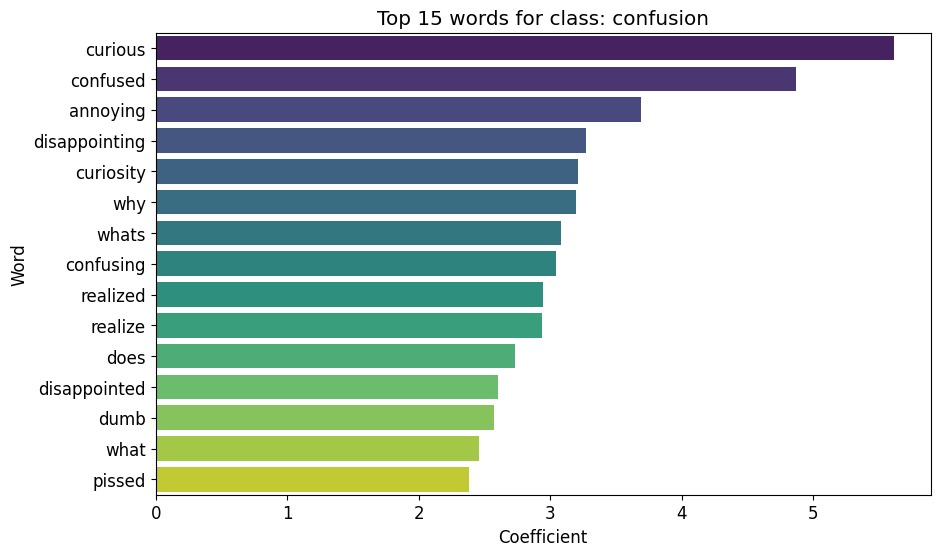


--- Class: desire ---
wish: 11.3442
crave: 7.3312
want: 7.0148
hope: 6.3256
dreaming: 6.0739
craving: 6.0452
longing: 5.6458
to: 5.4795
eager: 5.1336
need: 4.7405
yearn: 4.5458
desire: 4.4956
new: 4.2944
love: 4.2797
desperate: 4.2565


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


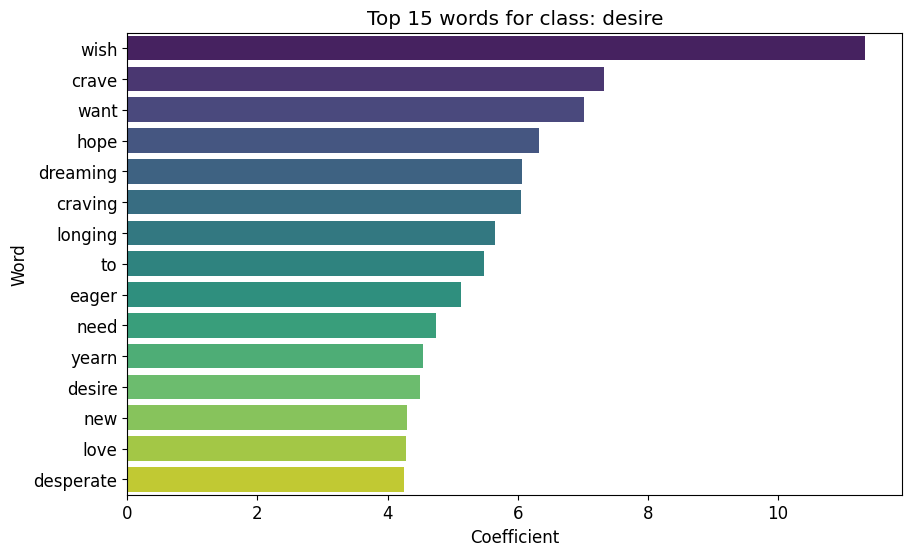


--- Class: disgust ---
disgusting: 7.9861
disgusted: 6.9836
revulsion: 6.6543
nauseating: 5.7652
disgust: 5.6931
repulsive: 5.1220
worst: 4.8826
aversion: 4.8323
awful: 4.6913
vile: 4.6390
revolted: 4.6101
repulsion: 4.5931
weird: 4.5669
sickened: 4.5457
worse: 4.4810


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


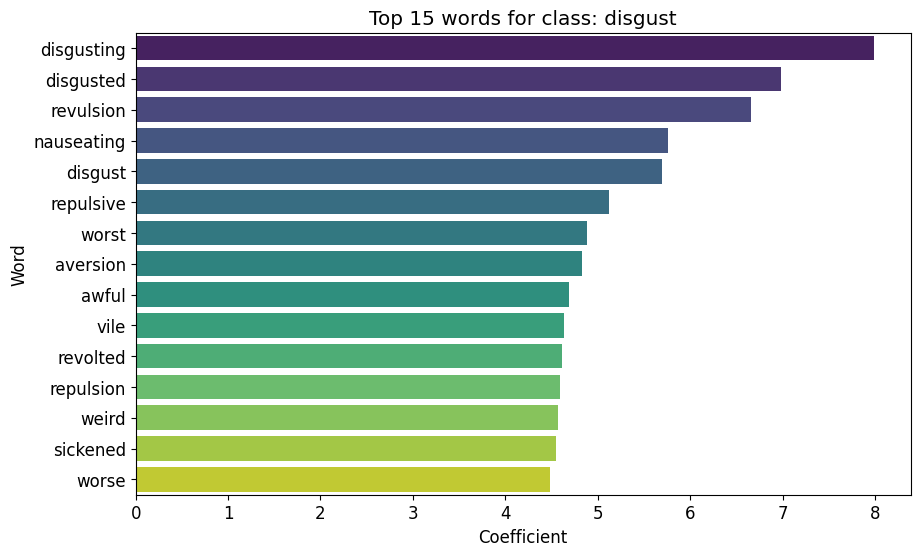


--- Class: fear ---
afraid: 9.4155
scared: 9.3244
terrified: 8.3484
nervous: 7.9952
reluctant: 7.7015
scary: 7.5380
apprehensive: 7.5377
vulnerable: 7.3530
frightened: 7.3007
paranoid: 7.2569
uncertain: 7.1672
unsure: 7.1022
shaky: 7.0869
feel: 6.9794
frantic: 6.9234


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


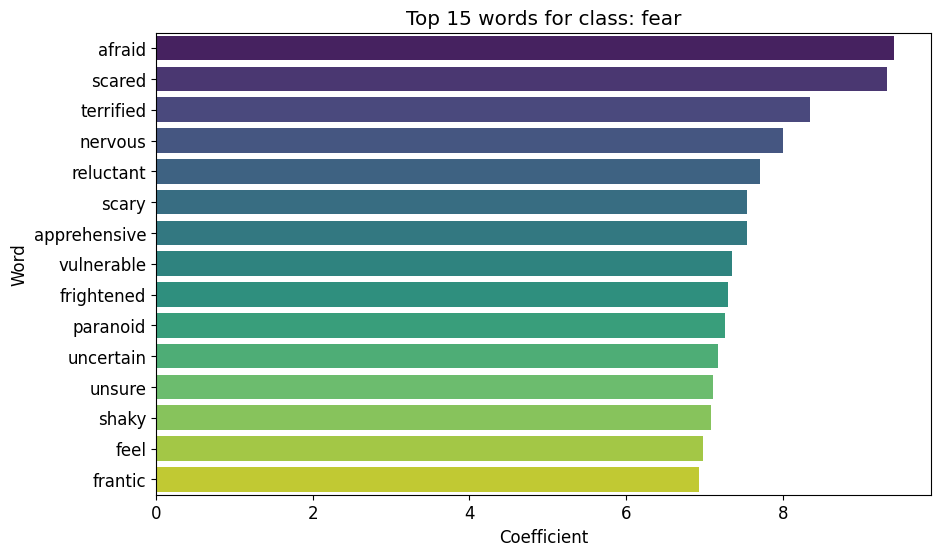


--- Class: guilt ---
sorry: 10.5407
guilty: 7.7014
remorse: 6.8368
regret: 6.4396
guilt: 5.4209
app: 4.7625
terrible: 4.6361
awful: 4.4118
bad: 4.1573
shouldn: 3.7426
apologies: 3.5717
glitch: 3.5459
error: 3.4755
apologize: 3.4421
responsibility: 3.4246


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


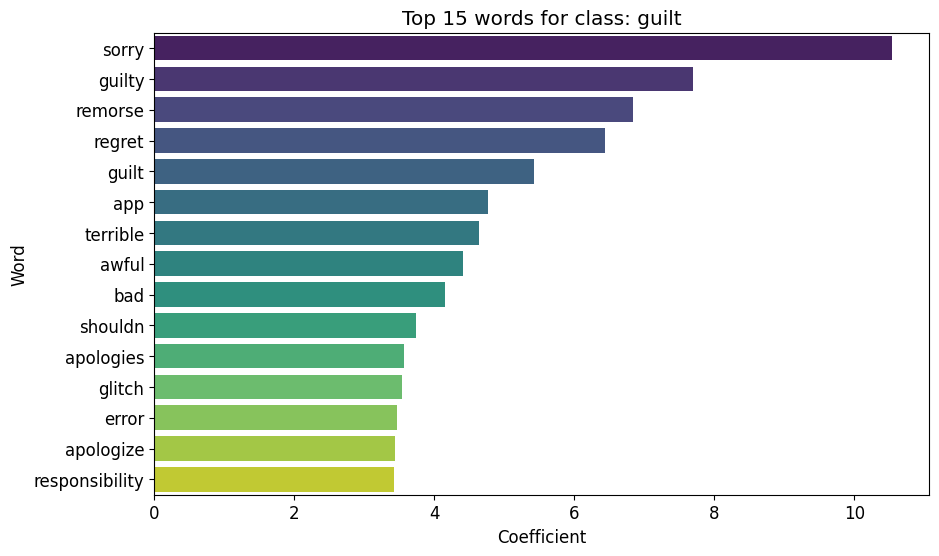


--- Class: happiness ---
feel: 9.2270
lol: 7.8109
thank: 7.7777
thanks: 7.4564
glad: 7.2232
happy: 6.2281
haha: 5.7571
fun: 5.5902
contentment: 5.1800
ecstatic: 5.1697
hilarious: 4.8310
enjoy: 4.8085
overjoyed: 4.6966
funny: 4.6819
delighted: 4.6348


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


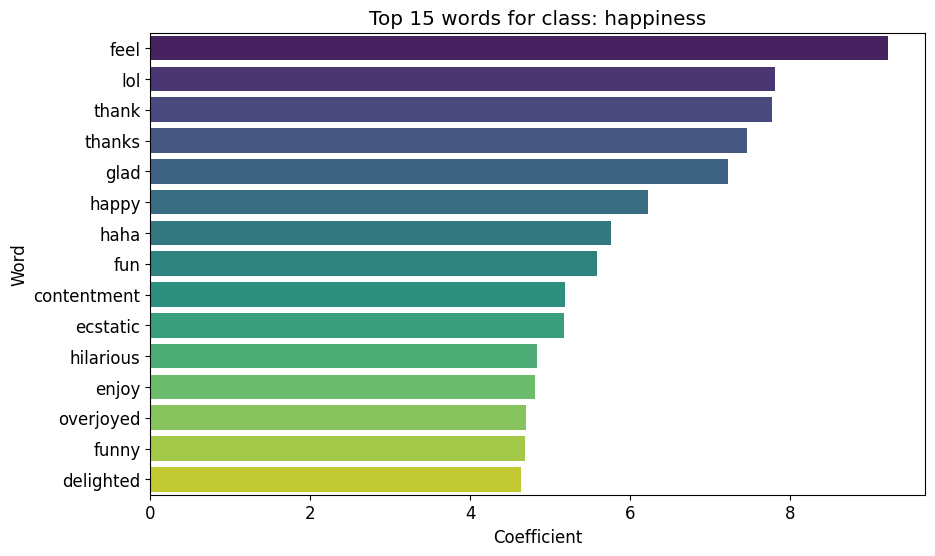


--- Class: love ---
sympathetic: 8.6866
love: 8.2971
nostalgic: 7.8570
tender: 7.7016
fond: 7.1901
horny: 7.1297
awesome: 6.9882
loyal: 6.9707
great: 6.8797
naughty: 6.8156
supportive: 6.7850
gentle: 6.7450
caring: 6.1900
romantic: 6.1316
beloved: 6.1130


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


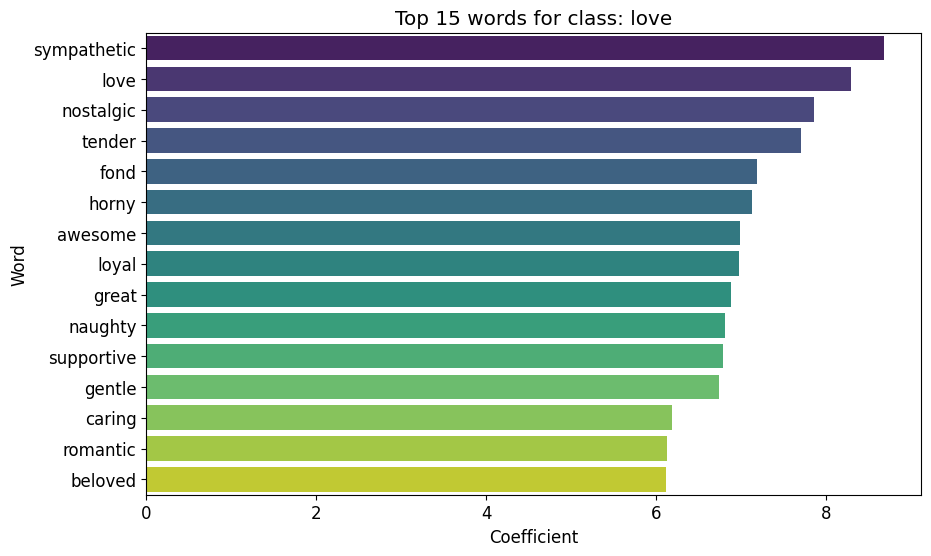


--- Class: neutral ---
breeze: 2.3505
theyre: 2.2158
hello: 2.1748
theres: 2.1595
afternoon: 2.1307
doesnt: 2.1174
ends: 2.1025
starts: 2.1011
today: 1.9823
theyll: 1.9169
lets: 1.9081
sir: 1.8581
they: 1.8216
net: 1.8138
mr: 1.8088


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


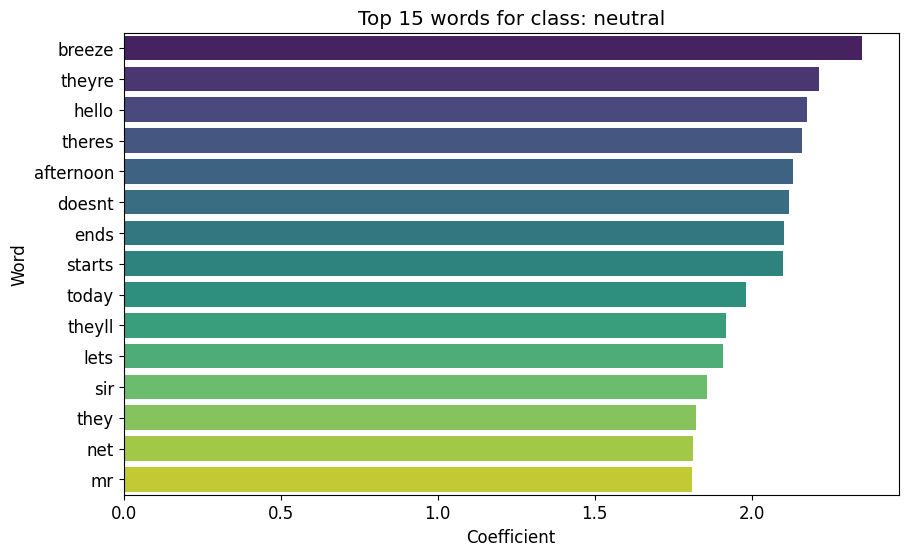


--- Class: sadness ---
feel: 11.6219
melancholy: 8.5773
sad: 8.4900
sadly: 6.5164
feeling: 6.5143
lethargic: 6.2977
sorry: 6.2951
sorrow: 6.0505
unfortunate: 5.8158
unimportant: 5.7842
vain: 5.7312
pathetic: 5.6852
groggy: 5.6178
lousy: 5.5764
unwelcome: 5.5684


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


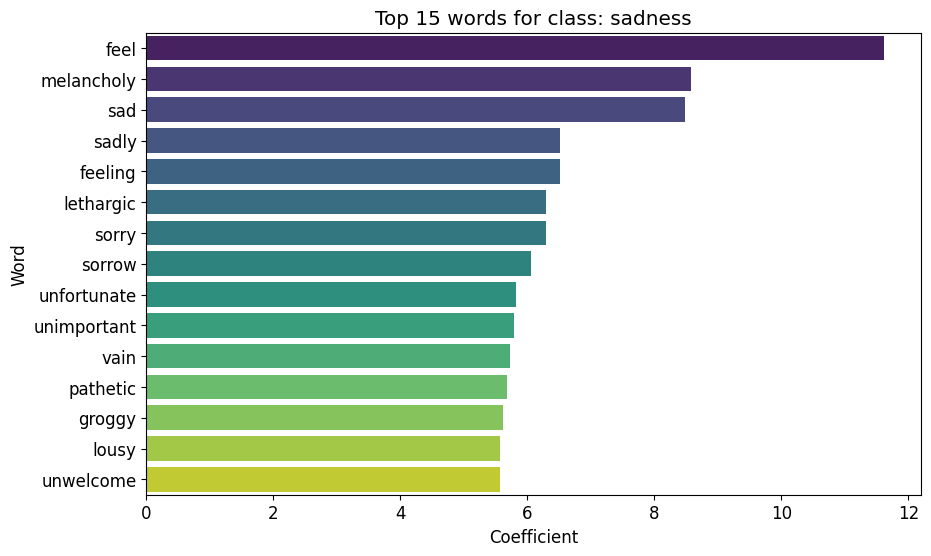


--- Class: sarcasm ---
fantastic: 6.6047
yay: 6.5376
wow: 6.3791
brilliant: 5.8911
sure: 5.7227
oh: 5.2848
thrilled: 4.9716
great: 4.9579
perfect: 4.6158
yeah: 4.4451
splendid: 4.3493
how: 4.3430
amazing: 4.3247
crashes: 3.7236
your: 3.7086


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


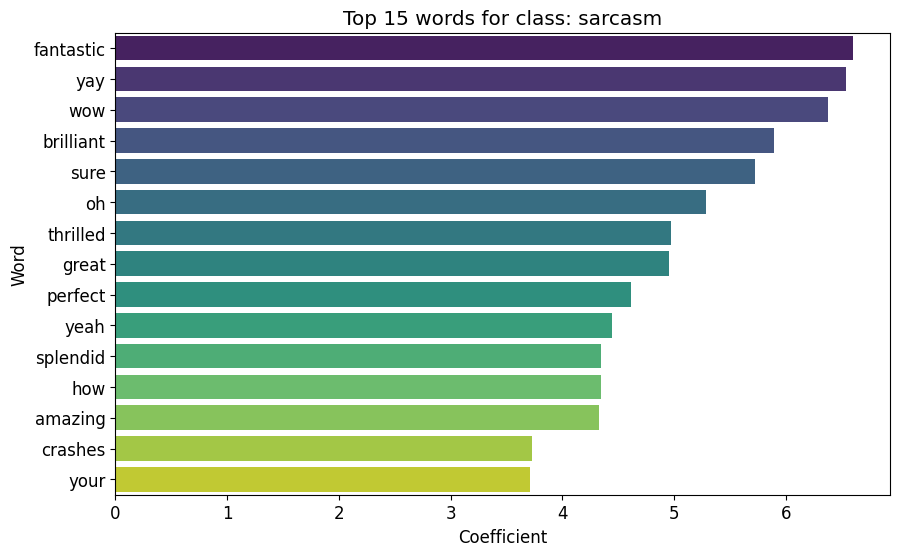


--- Class: shame ---
ashamed: 8.4028
sorry: 8.2482
embarrassment: 7.7197
embarrassed: 7.4004
humiliated: 7.1710
embarrassing: 7.1474
mortified: 6.5169
shame: 6.2897
awkward: 5.9624
foolish: 5.9576
selfconsciousness: 5.3632
regret: 4.7584
weird: 4.7335
error: 3.8483
cringy: 3.7019


<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')


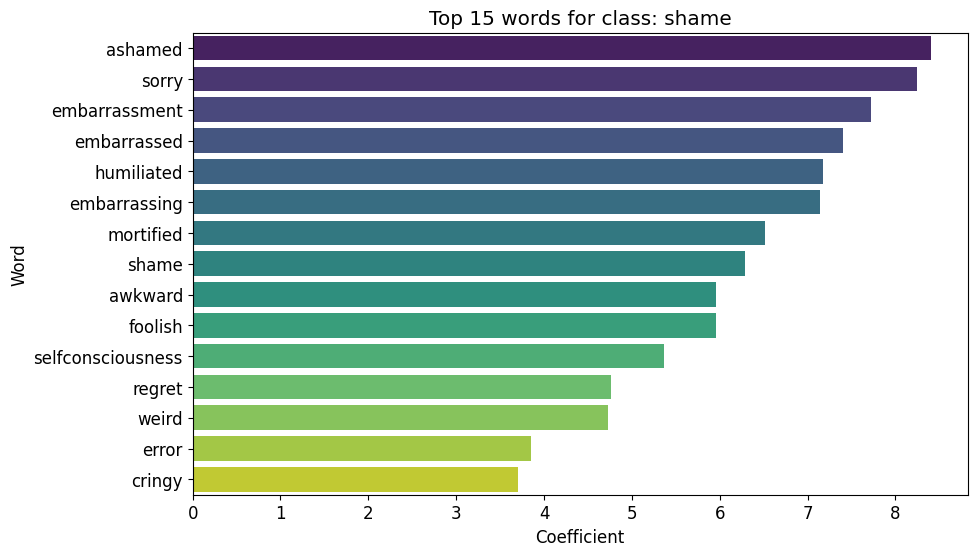

<ipython-input-12-2fe93a71e4a2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_words, palette='viridis')



--- Class: surprise ---
feel: 12.8234
surprised: 8.8099
feeling: 7.8915
shocked: 7.2929
amazed: 6.9136
funny: 6.3946
curious: 6.2231
stunned: 6.1616
amaze: 6.1222
surprise: 5.9747
impress: 5.8463
wow: 5.5522
daze: 5.5428
shock: 5.1327
impressed: 4.9340


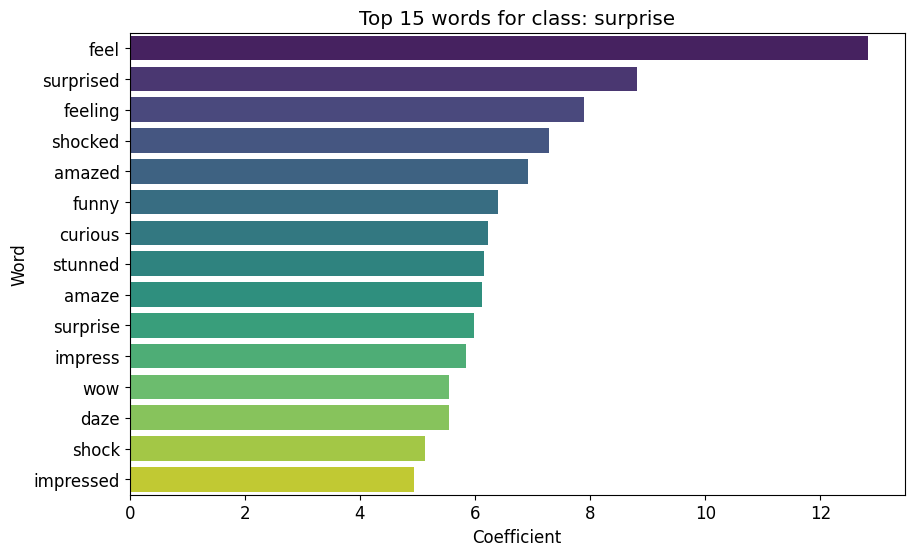

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# Step 7: Visualize Top Words for each category (from TF-IDF coefficients)

# Get feature names (words) from the TF-IDF vectorizer
feature_names = np.array(tfidf.get_feature_names_out())

# Get the coefficients from the Logistic Regression model
coefficients = clf.coef_

# Get the class names
class_names = clf.classes_

# Number of top words to display per class
n_top_words = 15

print(f"\nTop {n_top_words} words per class (TF-IDF coefficients):")

# Iterate through each class
for i, class_name in enumerate(class_names):
    # Get the coefficients for the current class
    class_coeffs = coefficients[i, :]
    # Sort coefficients in descending order and get the indices
    sorted_coef_indices = class_coeffs.argsort()[::-1]
    # Get the top words and their coefficients
    top_words = feature_names[sorted_coef_indices[:n_top_words]]
    top_coefs = class_coeffs[sorted_coef_indices[:n_top_words]]

    print(f"\n--- Class: {class_name} ---")
    # Print the top words and their coefficients
    for word, coef in zip(top_words, top_coefs):
        print(f"{word}: {coef:.4f}")

    # Visualize the top words and their coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_coefs, y=top_words, palette='viridis')
    plt.title(f'Top {n_top_words} words for class: {class_name}')
    plt.xlabel('Coefficient')
    plt.ylabel('Word')
    plt.show()
